# La quantità americana significa qualità? #

## Introduzione ##

Da sempre per fattori storici e culturali, gli Stati Uniti sono stati il paese di riferimento per la produzione di film e serie televisive. Questo ha portato ad una grande quantità di contenuti prodotti, ma non sempre di qualità. Forse questo è dovuto da un circolo che si è venuto a creare di produzione di contenuti per soddisfare la domanda, che a sua volta è cresciuta grazie alla grande fama di Hollywood e simili. In questo studio si vuole analizzare se la quantità di contenuti prodotti negli Stati Uniti è correlata alla qualità degli stessi. Inoltre analizzeremo quali paesi producono i contenuti più apprezzati, e confronteremo i risultati con la quantità di contenuti prodotti per ogni paese. Per fare un controllo della qualità della produzione cinematografica ci faremo anche una seconda domanda: i film più apprezzati sono anche quelli più premiati? Per questo confronteremo anche i premi vinti agli oscar awards. Inoltre considereremo anche un altro fattore che potrebbe influenzare la qualità dei film: gli attori. Infatti, si potrebbe pensare che un film con attori più famosi sia di qualità superiore. Per questo analizzeremo anche la quantità di film in cui hanno recitato gli attori più famosi e i loro premi vinti.

## Metodi ##

Per rispondere alle domande poste, si è deciso di utilizzare vari dataset tra loro correlati. Essi ci forniscono varie informazioni importanti per la nostra analisi come la valutazione di un film, la data di uscita, gli attori principali, i premi vinti, il paese di produzione ecc...
I dataset utilizzati sono quelli che abbiamo già utilizzato nel documento precedente per la pulizia di essi.
Confronteremo i dati per vedere se esiste una correlazione tra la quantità di film prodotti e la qualità degli stessi. Inoltre confronteremo i dati per vedere se i film più apprezzati sono anche quelli più premiati. Confronteremo anche i dati per vedere se i film con attori più premiati sono di qualità superiore.
Inoltre faremo un'analisi sul genere del film, per vedere se esso influisce sulla qualità del film.
Per fare ciò, utilizzeremo la libreria pandas per manipolare i dati, le librerie matplotlib, seaborn, geopandas e plotly per visualizzarli.



## Analisi ##

Procediamo adesso con l'analisi vera e propria dei dati. Iniziamo con l'importare i dataset e visualizzarli.

### Import delle librerie ###

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import os
import matplotlib.colors as clr

### Import dei dataset ###

In [26]:
output_dir = 'Output'

actors_df = pd.read_csv(os.path.join(output_dir, 'actors_cleaned.csv'))
countries_df = pd.read_csv(os.path.join(output_dir, 'countries_cleaned.csv'))
crews_df = pd.read_csv(os.path.join(output_dir, 'crews_cleaned.csv'))
genres_df = pd.read_csv(os.path.join(output_dir, 'genres_cleaned.csv'))
languages_df = pd.read_csv(os.path.join(output_dir, 'languages_cleaned.csv'))
movies_df = pd.read_csv(os.path.join(output_dir, 'movies_cleaned.csv'))
posters_df = pd.read_csv(os.path.join(output_dir, 'posters_cleaned.csv'))
releases_df = pd.read_csv(os.path.join(output_dir, 'releases_cleaned.csv'))
studios_df = pd.read_csv(os.path.join(output_dir, 'studios_cleaned.csv'))
themes_df = pd.read_csv(os.path.join(output_dir, 'themes_cleaned.csv'))
rotten_tomatoes_df = pd.read_csv(os.path.join(output_dir, 'rotten_tomatoes_cleaned.csv'))
oscar_df = pd.read_csv(os.path.join(output_dir, 'oscar_cleaned.csv'))

### Visualizzazione grafica dei dataset ###

Cominciamo con il contare il numero di film per ogni paese, per controllare che effettivamente gli Stati Uniti siano il paese che produce più film.
Usiamo geopandas per visualizzare i dati su una mappa. Inoltre dal sito https://www.naturalearthdata.com/downloads/120m-cultural-vectors/ abbiamo scaricato il file zip contenente i confini dei paesi del mondo.
Ecco le caratteristiche della mappa e un suo primo plot.

['featurecla' 'scalerank' 'LABELRANK' 'SOVEREIGNT' 'SOV_A3' 'ADM0_DIF'
 'LEVEL' 'TYPE' 'TLC' 'ADMIN' 'ADM0_A3' 'GEOU_DIF' 'GEOUNIT' 'GU_A3'
 'SU_DIF' 'SUBUNIT' 'SU_A3' 'BRK_DIFF' 'NAME' 'NAME_LONG' 'BRK_A3'
 'BRK_NAME' 'BRK_GROUP' 'ABBREV' 'POSTAL' 'FORMAL_EN' 'FORMAL_FR'
 'NAME_CIAWF' 'NOTE_ADM0' 'NOTE_BRK' 'NAME_SORT' 'NAME_ALT' 'MAPCOLOR7'
 'MAPCOLOR8' 'MAPCOLOR9' 'MAPCOLOR13' 'POP_EST' 'POP_RANK' 'POP_YEAR'
 'GDP_MD' 'GDP_YEAR' 'ECONOMY' 'INCOME_GRP' 'FIPS_10' 'ISO_A2' 'ISO_A2_EH'
 'ISO_A3' 'ISO_A3_EH' 'ISO_N3' 'ISO_N3_EH' 'UN_A3' 'WB_A2' 'WB_A3'
 'WOE_ID' 'WOE_ID_EH' 'WOE_NOTE' 'ADM0_ISO' 'ADM0_DIFF' 'ADM0_TLC'
 'ADM0_A3_US' 'ADM0_A3_FR' 'ADM0_A3_RU' 'ADM0_A3_ES' 'ADM0_A3_CN'
 'ADM0_A3_TW' 'ADM0_A3_IN' 'ADM0_A3_NP' 'ADM0_A3_PK' 'ADM0_A3_DE'
 'ADM0_A3_GB' 'ADM0_A3_BR' 'ADM0_A3_IL' 'ADM0_A3_PS' 'ADM0_A3_SA'
 'ADM0_A3_EG' 'ADM0_A3_MA' 'ADM0_A3_PT' 'ADM0_A3_AR' 'ADM0_A3_JP'
 'ADM0_A3_KO' 'ADM0_A3_VN' 'ADM0_A3_TR' 'ADM0_A3_ID' 'ADM0_A3_PL'
 'ADM0_A3_GR' 'ADM0_A3_IT' 'ADM0_A3_NL' 'ADM0_

<Axes: >

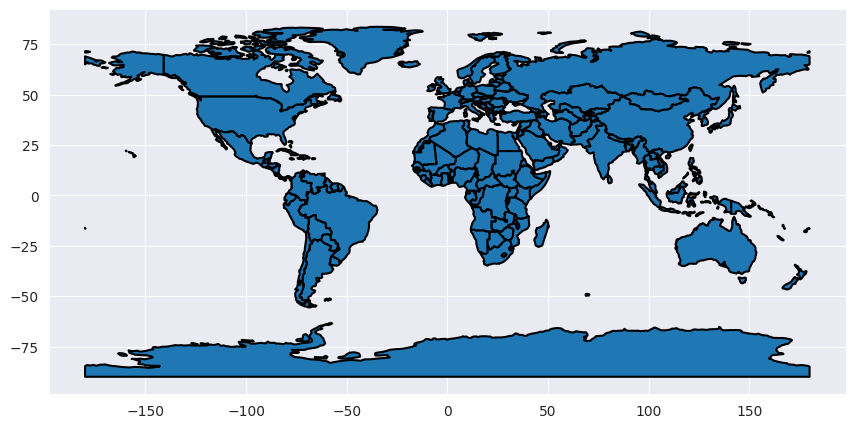

In [27]:
# Percorso del file scaricato
zip_file_path = os.path.join('Data', 'Maps', 'ne_110m_admin_0_countries.zip')

# Carica il dataset naturalearth_lowres dal file scaricato
gdf = gpd.read_file(f'zip://{zip_file_path}')

# Stampa di tutte le colonne di gdf in una lista
print(gdf.columns.values)

gdf.plot(edgecolor='black', linewidth=1.5, figsize=(15,5))

Ora contiamo il numero di film prodotti per ogni paese e visualizziamo i risultati su una mappa.

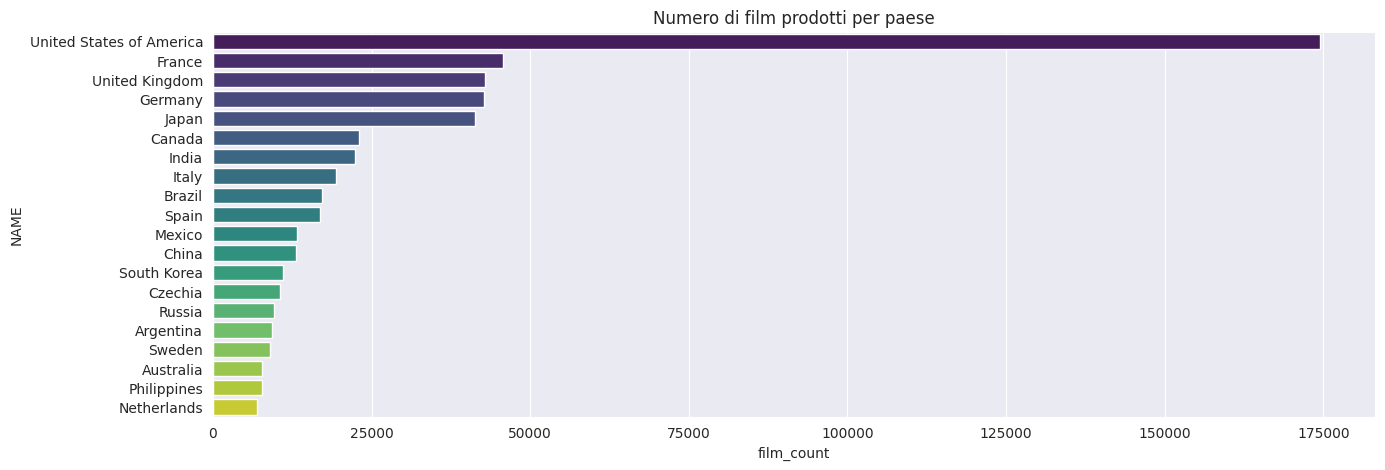

In [28]:
# Esegui il join tra countries_df e gdf su country_name e country
merged_df = gdf.merge(countries_df, left_on='NAME', right_on='country_name', how='left')

# Conta il numero di film per ogni paese
country_film_counts = merged_df.groupby('NAME').size().reset_index(name='film_count')

# Ordina i paesi per numero di film prodotti in ordine decrescente
sorted_country_film_counts = country_film_counts.sort_values(by='film_count', ascending=False)

# Visualizza i primi 20 paesi con il numero di film prodotti in un grafico a barre

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.barplot(x='film_count', y='NAME', data=sorted_country_film_counts.head(20), ax=ax, hue='NAME', palette='viridis', legend=False)
plt.title('Numero di film prodotti per paese')
plt.show()


Notiamo che la prima ipotesi si è rivelata corretta: gli Stati Uniti sono il paese che produce più film (anche di tanto)
Visualizziamo questa informazione su una mappa.

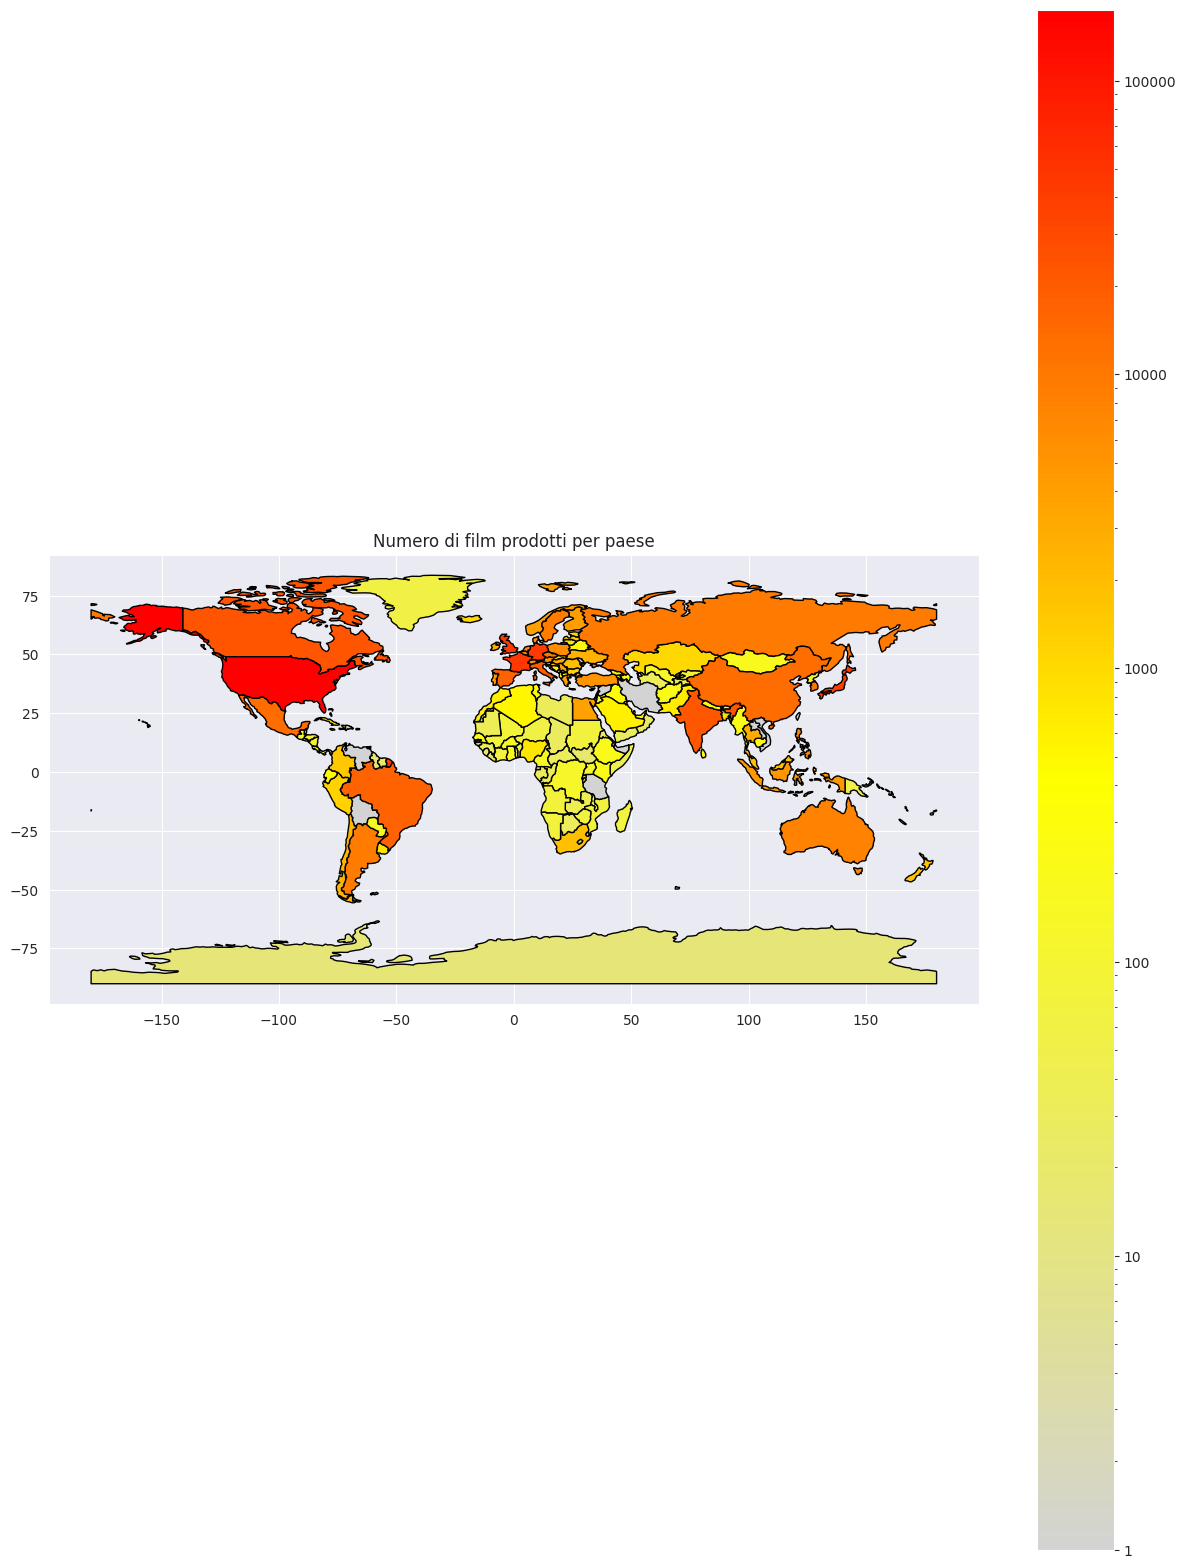

In [29]:
# Merge the film counts back to the GeoDataFrame
merged_df = gdf.merge(country_film_counts, left_on='NAME', right_on='NAME', how='left')

# Define a custom colormap
cmap = clr.LinearSegmentedColormap.from_list('custom_cmap', ['lightgrey', 'yellow', 'red'])

# Plot the map with the custom colormap and logarithmic scale
fig, ax = plt.subplots(1, 1, figsize=(15, 20))
norm = clr.LogNorm(vmin=1, vmax=merged_df['film_count'].max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar.set_array([])

merged_df.plot(column='film_count', ax=ax, legend=False, cmap=cmap, edgecolor='black', missing_kwds={"color": "lightgrey"}, norm=norm)
cbar = plt.colorbar(cbar, ax=ax,format='%.0f')
plt.title('Numero di film prodotti per paese')
plt.show()

Possiamo vedere che gli Stati Uniti sono il paese che produce più film, distaccando di molto gli altri paesi.

Procediamo ora con l'analisi della qualità dei film prodotti. Per fare ciò, calcoliamo le statistiche descrittive per ogni paese sul campo 'rating'. In particolare calcoliamo la media, la deviazione standard, la mediana, il minimo, il massimo, l'intervallo e il coefficiente di variazione.
Per fare ciò, uniamo i dataset 'movies_df' e 'countries_df' sul campo 'id', selezioniamo i primi 20 paesi con più film e calcoliamo le statistiche descrittive per ogni paese. Abbiamo scelto di considerare solo i primi 20 paesi per non appesantire troppo il grafico.

Creazione del DataFrame filtrato con i primi 20 paesi con più film

In [38]:
# Unisci i DataFrame su 'id'
merged_df = pd.merge(movies_df, countries_df, on='id')

# Conta il numero di film per ogni paese
country_film_counts = merged_df['country'].value_counts().reset_index()
country_film_counts.columns = ['country', 'film_count']

# Seleziona i primi 10 paesi con più film
top_10_countries = country_film_counts.head(10)

# Filtra il DataFrame unito per includere solo i film dei primi 10 paesi
top_10_merged_df = merged_df[merged_df['country'].isin(top_10_countries['country'])]



Confronto del rating per i migliori 10 paesi attraverso un grafico a violino

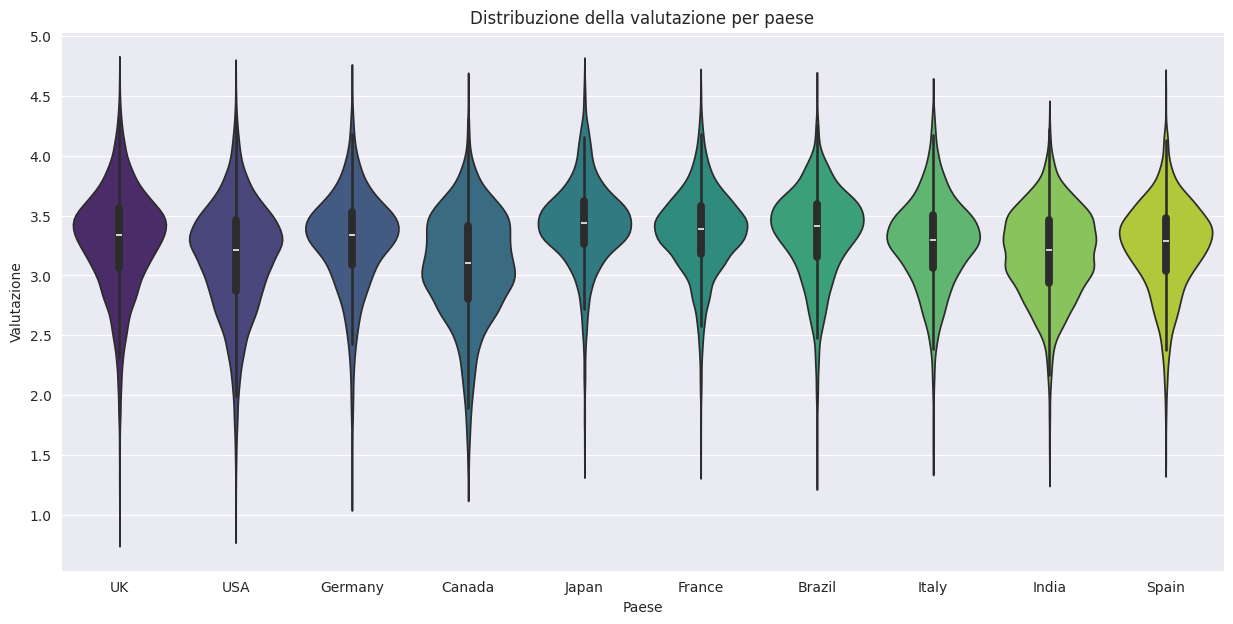

In [44]:
plt.figure(figsize=(15, 7))
sns.violinplot(x='country', y='rating', data=top_10_merged_df, hue='country', palette='viridis', legend=False)
plt.title('Distribuzione della valutazione per paese')
plt.xlabel('Paese')
plt.ylabel('Valutazione')
plt.show()

Notiamo che la valutazione dei film statunitensi è molto simile a quella degli UK, ma con valutazione media e picchi più bassi. Inoltre notiamo che per i paesi presi in analisi, la valutazione media è molto simile, che favorisce leggermente Francia e Brasile.

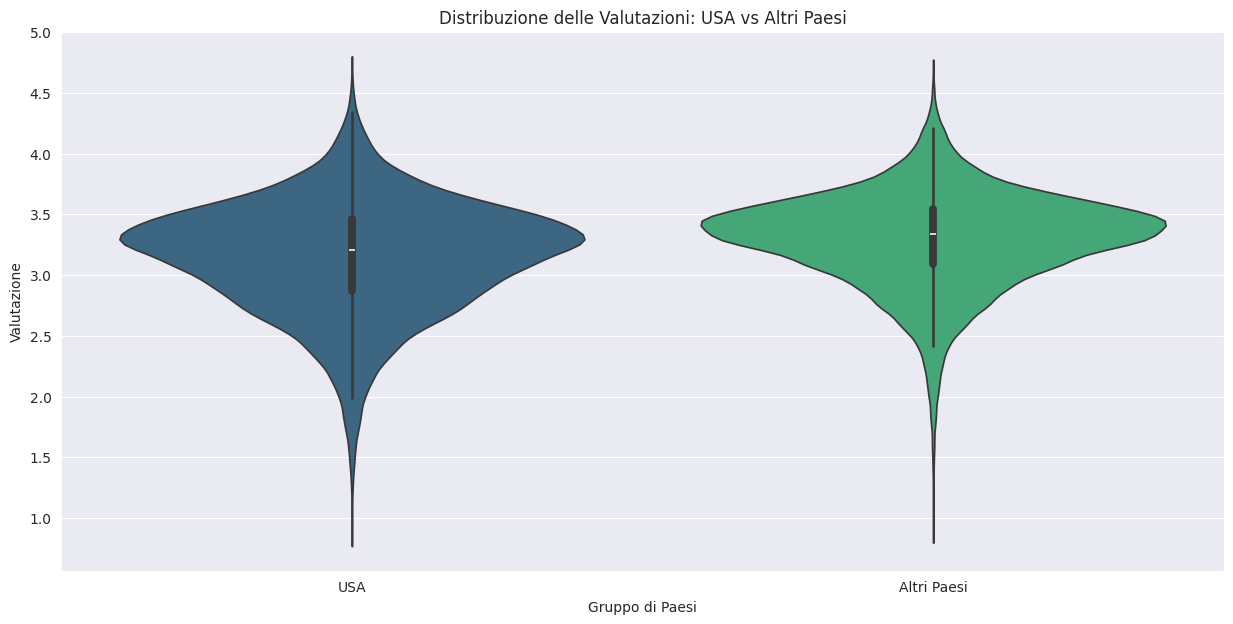

In [46]:
# Unisci i DataFrame su 'id'
merged_df = pd.merge(movies_df, countries_df, on='id')

# Filtra il dataset per separare gli Stati Uniti dagli altri paesi
us_df = merged_df[merged_df['country'] == 'USA'].copy()
other_countries_df = merged_df[merged_df['country'] != 'USA'].copy()

# Aggiungi una nuova colonna per distinguere tra Stati Uniti e altri paesi
us_df.loc[:, 'country_group'] = 'USA'
other_countries_df.loc[:, 'country_group'] = 'Altri Paesi'

# Combina i dataset filtrati
combined_df = pd.concat([us_df, other_countries_df])

# Crea il grafico a violino
plt.figure(figsize=(15, 7))
sns.violinplot(x='country_group', y='rating', data=combined_df, hue='country_group', palette='viridis', legend=False)
plt.title('Distribuzione delle Valutazioni: USA vs Altri Paesi')
plt.xlabel('Gruppo di Paesi')
plt.ylabel('Valutazione')
plt.show()

Notiamo che la valutazione media dei film statunitensi è leggermente inferiore rispetto a quella degli altri paesi. Questo potrebbe significare che la quantità di film prodotti negli Stati Uniti non è correlata alla qualità degli stessi. Possiamo inoltre notare che il numero di film prodotti negli Stati Uniti è molto maggiore, tanto che sommando il numero di film prodotti dagli altri paesi, si ottiene un numero simile rispetto a quello degli Stati Uniti.



Gli Stati Uniti producono più film perché hanno un mercato interno enorme, accesso ai capitali, infrastrutture avanzate, politiche di supporto e un’influenza culturale globale. Questo li rende il centro della produzione cinematografica mondiale. Inoltre alcuni stati degli USA offrono incentivi fiscali per la produzione cinematografica come la California, la Georgia e la Louisiana.